
# Project: Investigate Investigate a TMDb movie Dataset




<a id='intro'></a>
## Introduction

I select a TMDb movie Dataset from Kaggle website for analysis.  TMDb movie Dataset contains information about thousand  films like (revenue , budgets , release year and so on). I will ask the following questions , then trying to answer them at the exploratory data analysis section :
 
 - Which genre has the highest budget?
 - Is the genre with highest budget has highest revenue?
 - Which genre has the highest vote?
 - Are the movies producers prefer to cost less?
 
First i will wrangle the data . After the wrangling process the dataset will be clear enough to get useful outputs from it , so we can answer the questions we mentioned above.

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling




## Gathering Data Stage

#### - In this stage i will load the dataset .

In [245]:
# Loading the data 
df=pd.read_csv('tmdb-movies.csv')

## Assessing Data Stage

####  - In this stage i try to explore the dataset for missing values , columns datatypes , duplicates , unique values and so on 

In [246]:
#Displaying frist 10 rwos
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### There are columns unneeded for the analysis , so i will drop it

In [247]:
# View the index number and label for each column
for i, v in enumerate(df.columns):
    print(i, v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [248]:
# Creating a new dataframe containing necessary columns for analysis
df_new = df.iloc[:, np.r_[2,13, 17,19:21]]
df_new

,popularity,genres,vote_average,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09
...,...,...,...,...,...
10861,0.080598,Documentary,7.4,0.000000e+00,0.000000e+00
10862,0.065543,Action|Adventure|Drama,5.7,0.000000e+00,0.000000e+00
10863,0.065141,Mystery|Comedy,6.5,0.000000e+00,0.000000e+00
10864,0.064317,Action|Comedy,5.4,0.000000e+00,0.000000e+00


In [249]:
#Saving a new dataframe to a new file
df_new.to_csv('tmdb-movies_new.csv', index=False)

In [250]:
# Loading the new dataset 
df_movies=pd.read_csv('tmdb-movies_new.csv')

In [251]:
#Displaying frist 5 rwos
df_movies.head(5)

,popularity,genres,vote_average,budget_adj,revenue_adj
0,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09
1,28.419936,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08
2,13.112507,Adventure|Science Fiction|Thriller,6.3,1.012000e+08,2.716190e+08
3,11.173104,Action|Adventure|Science Fiction|Fantasy,7.5,1.839999e+08,1.902723e+09
4,9.335014,Action|Crime|Thriller,7.3,1.747999e+08,1.385749e+09


In [252]:
# Finding columns and rows numbers
df_movies.shape 

(10866, 5)

#### - There are 10866 rows and 21 columns.

In [253]:
# Printing a summary of the dataset
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   genres        10843 non-null  object 
 2   vote_average  10866 non-null  float64
 3   budget_adj    10866 non-null  float64
 4   revenue_adj   10866 non-null  float64
dtypes: float64(4), object(1)
memory usage: 424.6+ KB



####  - At we notice there are nulls (missing values) need to be cleaned.

In [254]:
# Checking for columns with missing values
df_movies.isna().sum()

popularity       0
genres          23
vote_average     0
budget_adj       0
revenue_adj      0
dtype: int64

In [255]:
# Checking for duplicates
duplicated_rows = df_movies[df_movies.duplicated()]
duplicated_rows

,popularity,genres,vote_average,budget_adj,revenue_adj
2090,0.59643,Crime|Drama|Action|Thriller|Science Fiction,5.0,30000000.0,967000.0


In [256]:
#Getting counts of unique values
df_movies['revenue_adj'].value_counts()

0.000000e+00    6016
8.103642e+07       2
1.438914e+07       2
2.093547e+08       2
5.766759e+07       2
                ... 
2.730934e+08       1
3.119749e+08       1
7.411891e+07       1
1.785337e+08       1
3.430163e+06       1
Name: revenue_adj, Length: 4840, dtype: int64

####  - At we notice the column ( revenue_adj ) has rows with (zero) values , this mean that there are movies with no revenues  ,this is not logical .For  analysis quality i will remove the rows with zero values . 

##  Summary of Assessing Stage:
 
  - I selected range of necessary columns for my analysis using Numpy.
  - There are 23 missing values in genres column that needed to be cleaned.
  - There are rows with (zero values) in budget_adj,revenue_adj colums that needed to be removed.
  - There is one row is duplicated taht needed to be cleaned.
  - The genres column contains maultiple values separated by '|', that values needed to be splitted to new column.


## Data Cleaning Stage

In [257]:
# Dropping the rows with missing values
df_movies.dropna(inplace=True)


In [258]:
# Checking for missing values
df_movies.isnull().sum()

popularity      0
genres          0
vote_average    0
budget_adj      0
revenue_adj     0
dtype: int64

In [259]:
df_movies = df_movies[(df_movies[['revenue_adj', 'budget_adj']] != 0).all(1)]

In [260]:
# Checking for zero values in revenue_adj column
df_movies[['revenue_adj' , 'budget_adj']].eq(0).any().any()

False

In [261]:
df_movies.shape

(3855, 5)

### The revenue_adj column now with no zeros

In [262]:
#Removing duplicates
df_movies.drop_duplicates(inplace=True)

In [263]:
df_movies.duplicated().sum()

0

In [264]:
#Splitting (genres) column that contains hybrid values to new column (genre) with single values
df_movies= df_movies.join(df_movies.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genre')).reset_index(drop=True)

In [265]:
df_movies.head(5)

,popularity,genres,vote_average,budget_adj,revenue_adj,genre
0,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,Action
1,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Action|Adventure|Science Fiction|Thriller,6.5,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Action|Adventure|Science Fiction|Thriller,7.1,1.379999e+08,3.481613e+08,Action


In [266]:
#Dropping genres column because it became unneeded for 
df_movies.drop(['genres'],axis=1 ,inplace=True)

## Exploratory Data Analysis

In [267]:
df_movies.head(5)

,popularity,vote_average,budget_adj,revenue_adj,genre
0,32.985763,6.5,1.379999e+08,1.392446e+09,Action
1,32.985763,6.5,1.379999e+08,1.392446e+09,Adventure
2,32.985763,6.5,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,6.5,1.379999e+08,1.392446e+09,Thriller
4,28.419936,7.1,1.379999e+08,3.481613e+08,Action


### I will got some statistics about the modified dataset 

In [268]:
df_movies.describe()

,popularity,vote_average,budget_adj,revenue_adj
count,10303.000000,10303.000000,1.030300e+04,1.030300e+04
mean,1.262140,6.156100,4.953497e+07,1.517441e+08
std,1.607645,0.789695,4.766345e+07,2.324153e+08
min,0.001117,2.200000,9.693980e-01,2.370705e+00
25%,0.476928,5.700000,1.554024e+07,2.041316e+07
50%,0.843170,6.200000,3.448528e+07,6.847909e+07
75%,1.462242,6.700000,6.956016e+07,1.825920e+08
max,32.985763,8.400000,4.250000e+08,2.827124e+09


### Now i will use the mean of budget_adj , revenue_adj and vote_average against genre to ask and answer questions about tahe dataset

In [269]:
# Grouping budgets by genre
mean_genre_budget = df_movies.groupby('genre').budget_adj.mean().reset_index()

# Which genre has the highest budget?

In [270]:
# Finding highest budget in descending order
mean_genre_budget.sort_values(['budget_adj', 'genre'], ascending=[False, False])

,genre,budget_adj
2,Animation,8.347215e+07
1,Adventure,8.125573e+07
8,Fantasy,8.023752e+07
7,Family,7.110099e+07
19,Western,6.719107e+07
0,Action,6.644262e+07
15,Science Fiction,6.561722e+07
18,War,5.727295e+07
10,History,5.687985e+07
17,Thriller,4.460177e+07


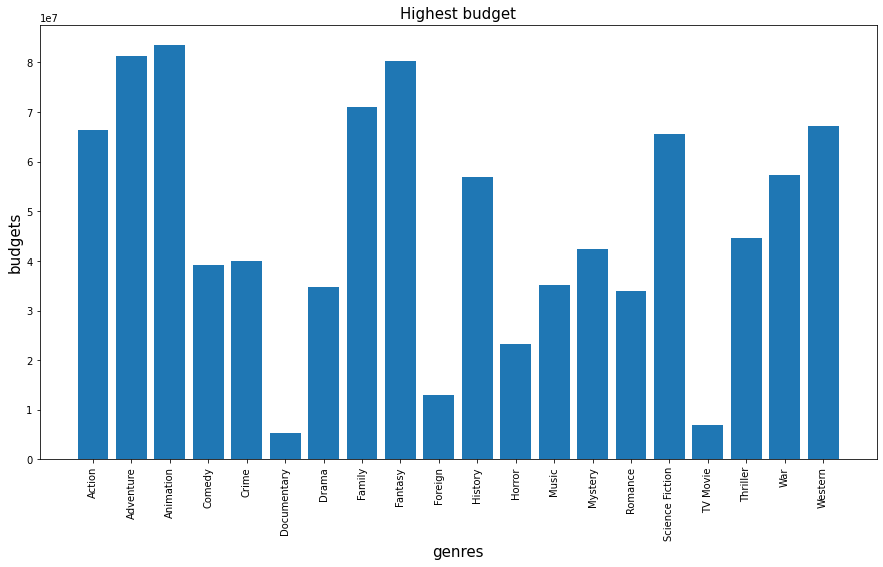

In [271]:
# Visualize the genre with the highest budget
x=mean_genre_budget["genre"]
y=mean_genre_budget["budget_adj"]
p_title="Highest budget"
x_lable='genres'
y_lable="budgets"
def genre_visual(x , y):
    fig,ax = plt.subplots(figsize=(15,8))
    ax.bar(x, y)
    plt.xticks(rotation=90)
#The title of the figure
    plt.title(p_title,fontsize=15)
    plt.xlabel(x_lable,fontsize=15)
    plt.ylabel(y_lable,fontsize= 15)
# The xlabel and ylabel of the figure

genre_visual(x,y)   



### At we notice there are 4 genres have the highest budgets( Animation , Advanture, Fantasy, Family) .

# Is the genre with highest budget has highest revenue?

In [272]:
# Grouping revenues by genre
mean_genre_revenue = df_movies.groupby('genre').revenue_adj.mean().reset_index()

In [273]:
# Finding highest revenues in descending order
mean_genre_revenue.sort_values(['revenue_adj', 'genre'], ascending=[False, False])

,genre,revenue_adj
2,Animation,2.909574e+08
1,Adventure,2.714075e+08
8,Fantasy,2.499928e+08
7,Family,2.437910e+08
15,Science Fiction,2.021531e+08
0,Action,1.953879e+08
18,War,1.558981e+08
19,Western,1.356748e+08
12,Music,1.345660e+08
17,Thriller,1.281709e+08


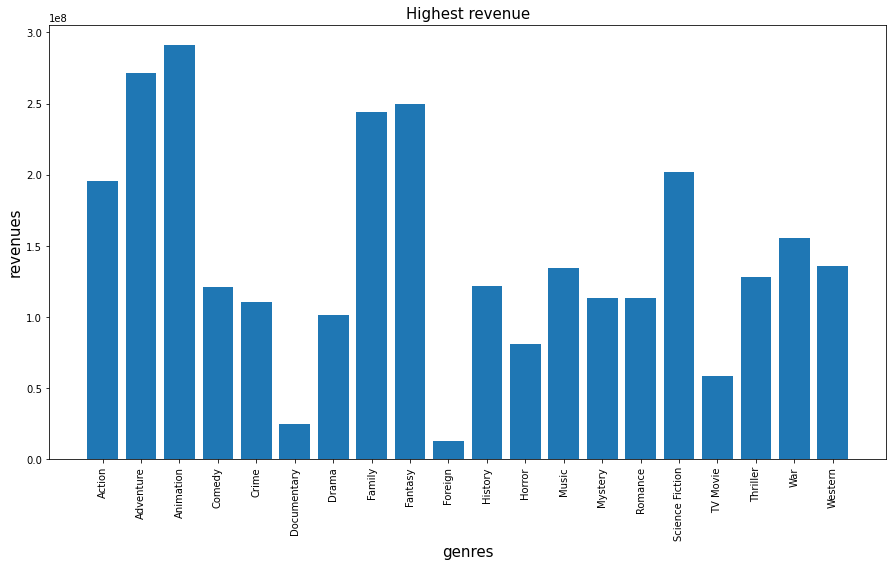

In [274]:
#Visualize the genre with the highest revenues
x=mean_genre_revenue["genre"]
y=mean_genre_revenue["revenue_adj"]
p_title="Highest revenue"
x_lable='genres'
y_lable="revenues"

genre_visual(x,y)

### As we notice that the 4 genres which have the highest budgets also have the highest revenues.

# Which genre has the highest vote?

In [275]:
# Grouping votes by genre
mean_genre_vote = df_movies.groupby('genre').vote_average.mean().reset_index()
# Finding highest votes in descending order
mean_genre_vote.sort_values(['vote_average', 'genre'], ascending=[False, False])

,genre,vote_average
5,Documentary,6.660000
18,War,6.586555
10,History,6.578295
19,Western,6.467308
6,Drama,6.396754
2,Animation,6.380597
12,Music,6.315441
4,Crime,6.300614
13,Mystery,6.194767
14,Romance,6.189955


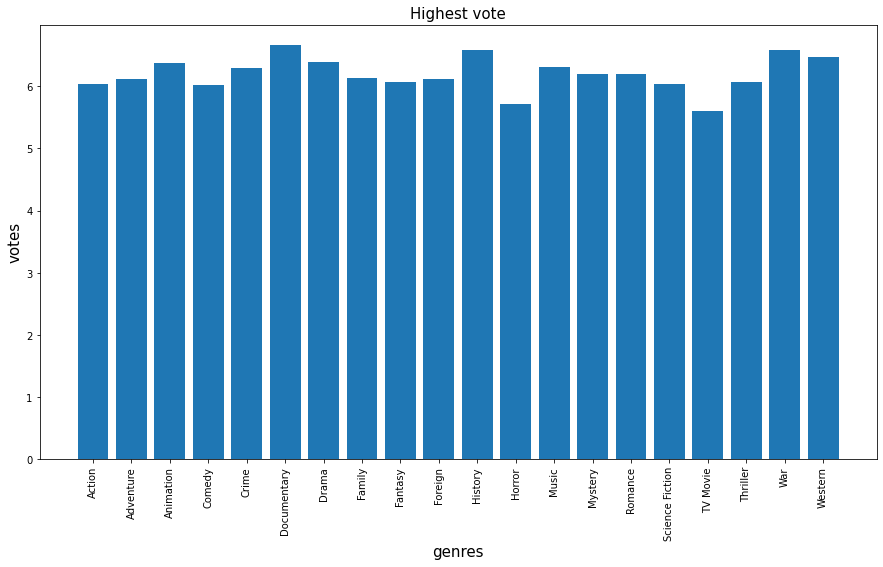

In [276]:
# Visualize the genre with the highest vote
x=mean_genre_vote["genre"]
y=mean_genre_vote["vote_average"]
p_title="Highest vote"
x_lable='genres'
y_lable="votes"

genre_visual(x,y)

### As we notice that most of genres have high vote , but Documentry genre has highest vote.

## Are the movies producers prefer to cost less?

C:\Users\carnival\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


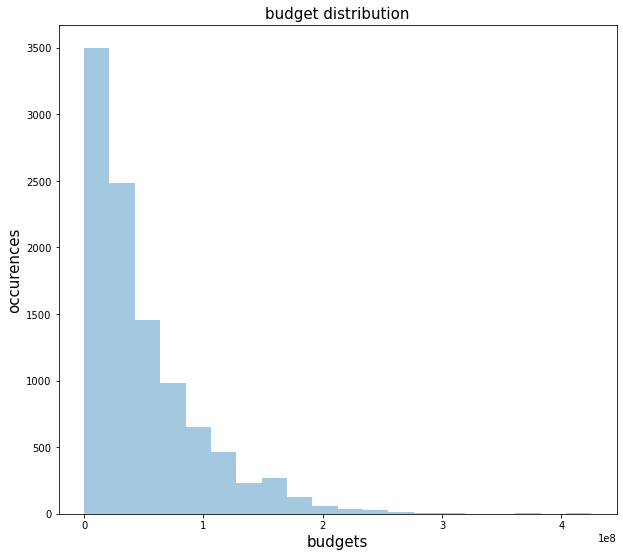

In [277]:
# Visualize budgets distribution
plt.figure(figsize=(10,9))
ax=sns.distplot(df_movies.budget_adj,bins=20,kde=False);
ax.set_xlabel('budgets',size=15);
ax.set_ylabel('occurences',size=15);
ax.set_title('budget distribution',size=15);

### As we notice the histogram above shows a skewed distribution to the right (positively skewed), meaning that , the producers prefer to cost less.

<a id='conclusions'></a>
## Summary of analysis findings

 - There are 4 genres have highest budgets with also highest revenues , the genres are (Animation , Advanture, Fantasy, Family).

 - Most of genres have high vote.

 - Most of movies producers prefer to cost less.

 ## The limitations
 
 
 - The data was untidy and its quality was low , there was tidiness and quality Issues.
 
 - One of very important quality issue that the original genres column had multiple values ,to group the movies features by its genres , i splitted that variables to new genre column.
  
 - Also there was an important quality issue , that the genre column had missing values , missing values can lead to wrong prediction or classification and can also cause a high bias for any estimations, so i cleaned that issue.
   
 - Another important tidiness issue ,that the revenue_adj and budget_adj columns had zero values which was  unlogic and negatively affect the analysis process, so i cleaned that issue.


 - Finally i dropped some unnecessary columns that unneeded for my analysis

In [280]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1